In [1]:
from ime_pylib import scan_tools as sc

import matplotlib.pyplot as plt
import numpy as np
import sympy
import scipy as sp
from scipy.optimize import curve_fit

In [2]:
from pbmgfunctions import model
from pbmgfunctions import fit
from pbmgfunctions import makefits
from pbmgfunctions import normcap
from pbmgfunctions import normloop
from pbmgfunctions import stiffness
from pbmgfunctions import stiffloop
from pbmgfunctions import stiffmodel
from pbmgfunctions import filledmodel
from pbmgfunctions import filledloop
from pbmgfunctions import plotfigs
from pbmgfunctions import plotloop

In [33]:
sc.set_path("./IME_datfiles/empty")
res_e = sc.scan_load(623,700)

# soreted specific files that should be loaded into different folders
# as to not overload memory with useless data
sc.set_path("./IME_datfiles/h2o/")
res_h2o = sc.scan_load(629,710)
sc.set_path("./IME_datfiles/d2o/")
res_d2o = sc.scan_load(646,700)
sc.set_path("./IME_datfiles/h2olipid/")
res_h2olip = sc.scan_load(652,720)
sc.set_path("./IME_datfiles/d2olipid/")
res_d2olip = sc.scan_load(655,707)

File: ./IME_datfiles/empty/MKA_000623.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/empty/MKA_000688.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/empty/MKA_000700.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/h2o/MKA_000629.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/h2o/MKA_000643.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/h2o/MKA_000644.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/d2o/MKA_000646.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/d2o/MKA_000647.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/d2o/MKA_000698.mat loaded . top_function: measure_c_bridge_li

In [42]:
Ccl_0 = 1.7e-8
Cfr_0 = 2e-8
f0_0 = 9.3e4
Q_0 = 100

p0_C = Ccl_0, Cfr_0, f0_0, Q_0
Cfit_e, popt_C_e = makefits(model, res_e, p0_C)
Cfit_h2o, popt_C_h2o = makefits(model, res_h2o, p0_C)
Cfit_d2o, popt_C_d2o = makefits(model, res_d2o, p0_C)
Cfit_d2olip, popt_C_d2olip = makefits(model, res_d2olip, p0_C)
Cfit_h2olip, popt_C_h2olip = makefits(model, res_h2olip, p0_C)
popt_C_d2o

array([[1.75914910e-08, 1.94994636e-08, 8.45035715e+04, 1.53222233e+02],
       [1.75894407e-08, 1.94962237e-08, 8.44975618e+04, 1.64114459e+02],
       [1.83461023e-08, 2.02928973e-08, 8.60382387e+04, 4.10124344e+02]])

In [5]:
F_e = normloop(res_e, popt_C_e)
F_h2o = normloop(res_h2o, popt_C_h2o)
F_d2o = normloop(res_d2o, popt_C_d2o)
F_d2olip = normloop(res_d2olip, popt_C_d2olip)
#F_h2olip = normloop(res_h2olip, popt_C_h2olip)

In [6]:
m = 0.005
r0 = 0.01
L = m/(4*np.pi*(r0**2))**2
V = (4/3)*np.pi*(r0**3)

S_e = stiffloop(res_e, popt_C_e, F_e, L)
S_h2o = stiffloop(res_h2o, popt_C_h2o, F_h2o, L)
S_d2o = stiffloop(res_d2o, popt_C_d2o, F_d2o, L)
S_d2olip = stiffloop(res_d2olip, popt_C_d2olip, F_d2olip, L)
#S_h2olip = stiffloop(res_h2olip, popt_C_h2olip, F_h2olip, L)

In [7]:
p0_S = 2.1e9, 3e4

S_fit_e, popt_S_e = makefits(stiffmodel, res_e, p0_S, S=S_e)
S_fit_h2o, popt_S_h2o = makefits(stiffmodel, res_h2o, p0_S, S=S_h2o)
S_fit_d2o, popt_S_d2o = makefits(stiffmodel, res_d2o, p0_S, S=S_d2o)
S_fit_d2olip, popt_S_d2olip = makefits(stiffmodel, res_d2olip, p0_S, S=S_d2olip)
#S_fit_h2olip, popt_S_h2olip = makefits(stiffmodel, res_h2olip, p0_S, S=S_h2olip)

In [8]:
C_e = filledloop(res_e, popt_C_e, popt_S_e, L)
C_h2o = filledloop(res_h2o, popt_C_h2o, popt_S_h2o, L)
C_d2o = filledloop(res_d2o, popt_C_d2o, popt_S_d2o, L)
C_d2olip = filledloop(res_d2olip, popt_C_d2olip, popt_S_d2olip, L)
#C_h2olip = filledloop(res_h2olip, popt_C_h2olip, popt_S_h2olip, L)
#Cwater = filledmodel(res[10].fr_bridge, popt[10][0], popt[10][1], popt[10][2], popt[10][3], popt_Swater[0], popt_Swater[1], L)
np.shape(C_e[0])

(4000,)


def plotloop(x, y, ls=':', imag=False, special=False, alpha=1, marker=',', lw=.8):
    ccycle = ['b', 'r', 'g', 'm', 'k', 'c']
    if special==False:
        if imag==True:
            for i in range(len(x)):
                plt.plot(x[i].fr_bridge, -y[i].imag, ls=ls, c=ccycle[i], alpha=alpha, marker=marker, lw=lw)
        else:
            for i in range(len(x)):
                plt.plot(x[i].fr_bridge, y[i].real, ls=ls, c=ccycle[i], alpha=alpha, marker=marker, lw=lw)
    else:
        if imag==True:
            for i in range(len(x)):
                plt.plot(x[i].fr_bridge, -y[i].C_bridge.imag, ls=ls, c=ccycle[i], alpha=alpha, marker=marker, lw=lw)
        else:
            for i in range(len(x)):
                plt.plot(x[i].fr_bridge, y[i].C_bridge.real, ls=ls, c=ccycle[i], alpha=alpha, marker=marker, lw=lw)
    plt.xlim(0,4e5)

plotloop(res_h2o, res_h2o, special=True, ls=" ")

(0.0, 250000.0)

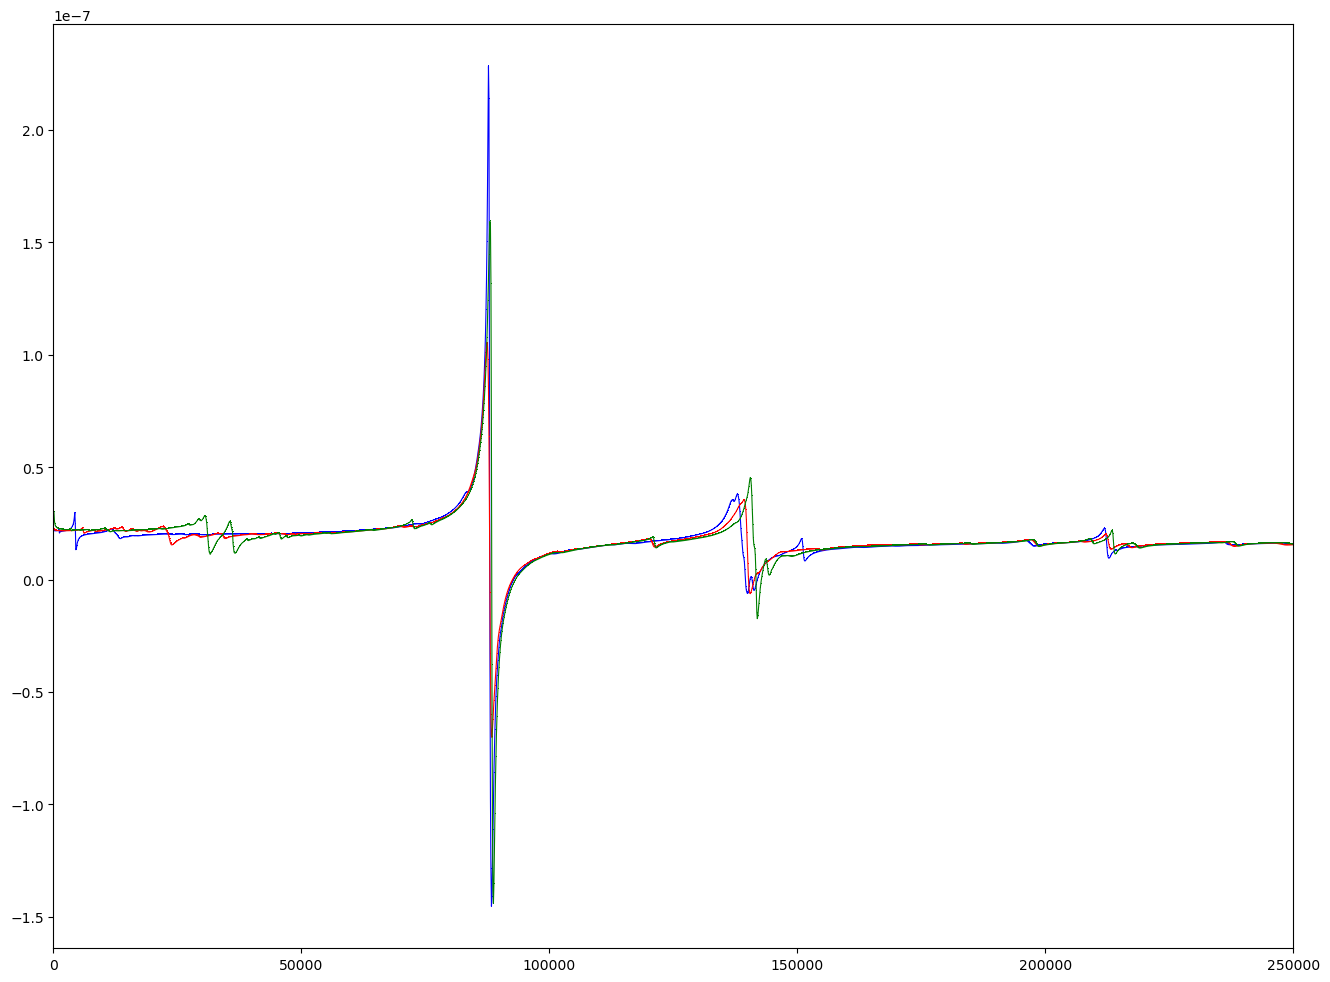

In [9]:
plt.figure(figsize=(16,12))
plotloop(res_h2o, res_h2o, lw=.8, ls='-')
plt.xlim(0,2.5e5)

(0.0, 400000.0)

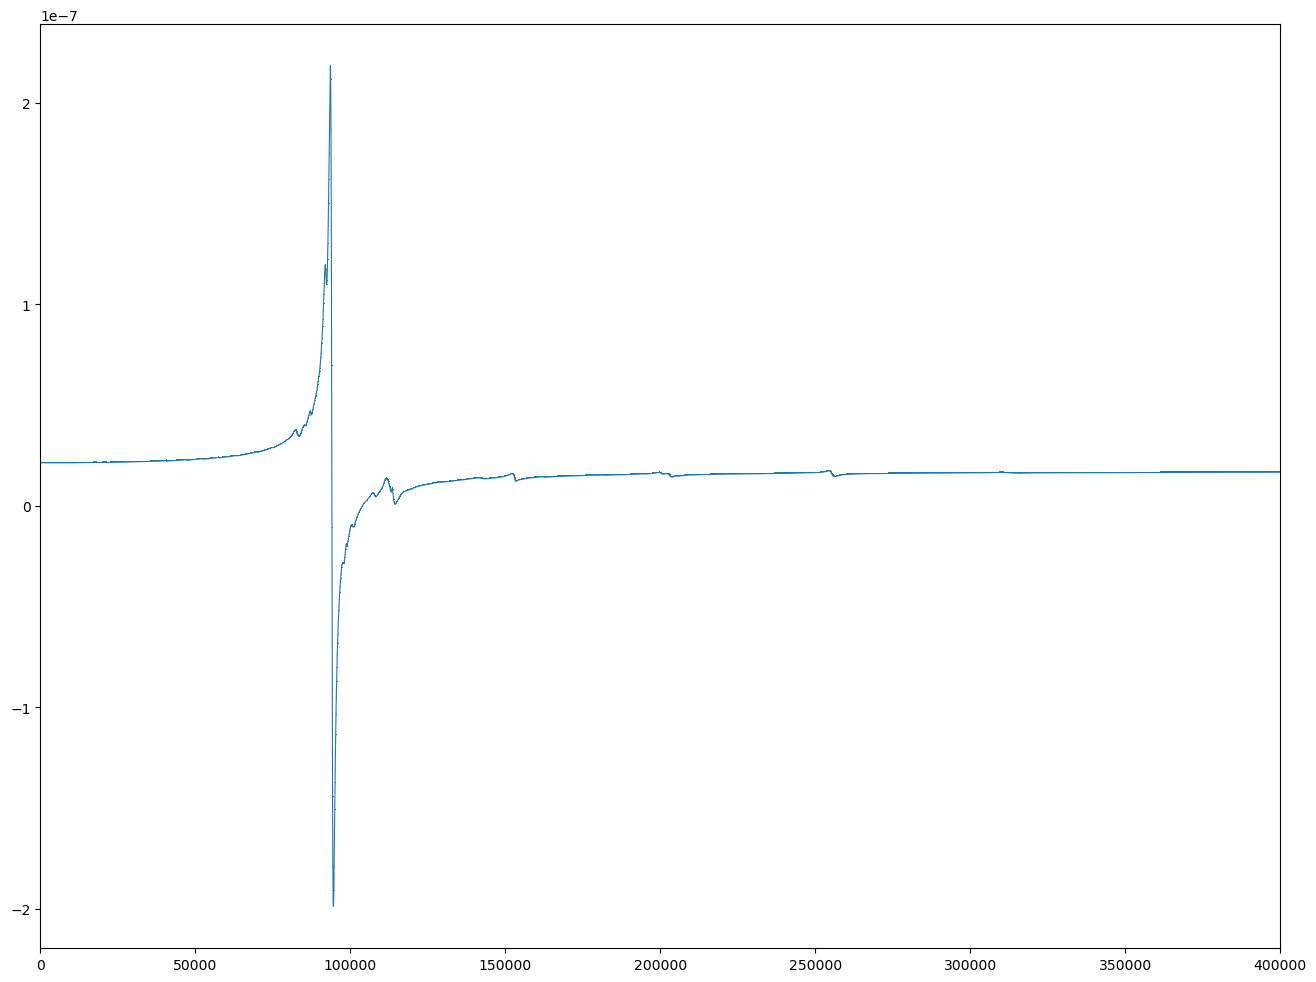

In [10]:
plt.figure(figsize=(16,12))
plt.plot(res_e[0].fr_bridge, res_e[0].C_bridge.real, marker=',', linewidth=.8)
plt.xlim(0,4e5)

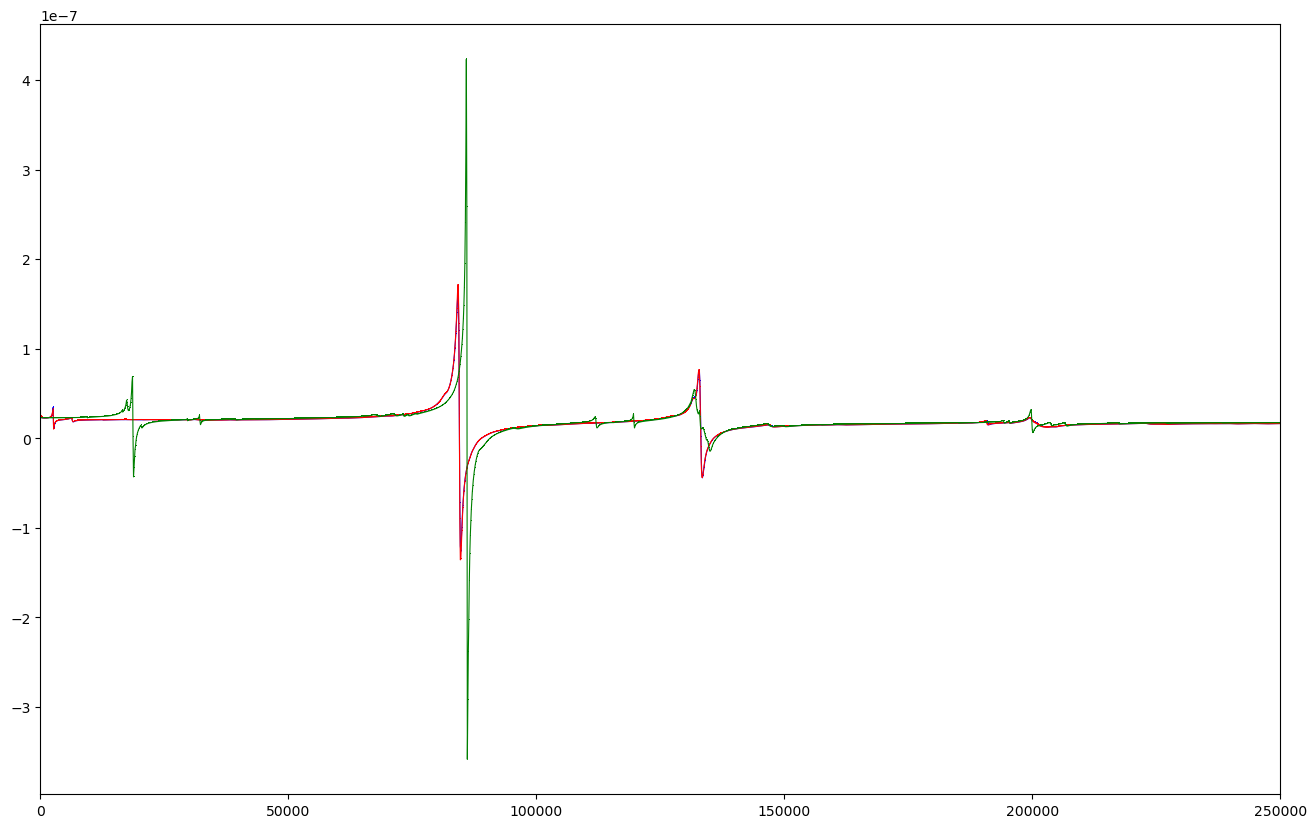

(0.0, 250000.0)

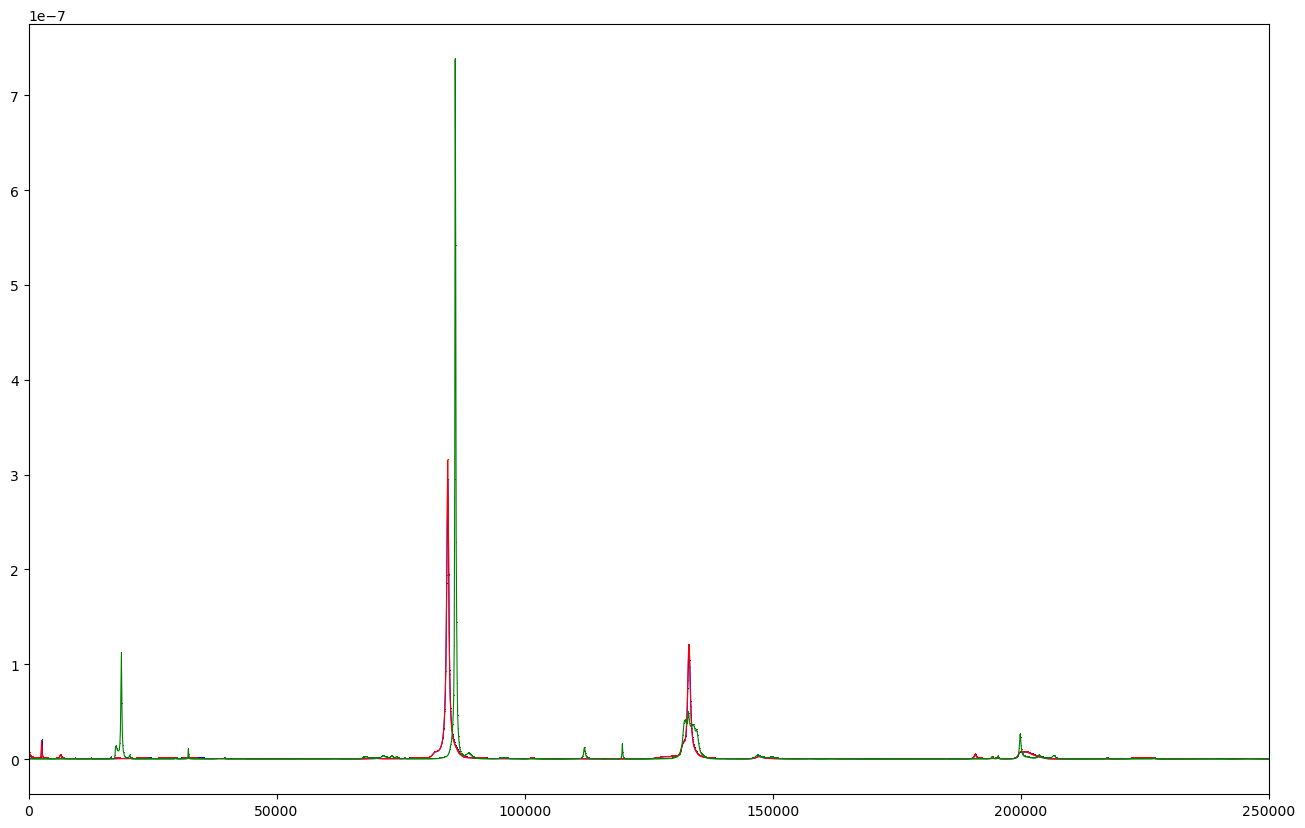

In [11]:
plt.figure(figsize=(16,10))
plotloop(res_d2o, res_d2o, ls='-')
plt.xlim(0,2.5e5)
plt.show()
plt.figure(figsize=(16,10))
plotloop(res_d2o, res_d2o, imag=True, ls='-')
plt.xlim(0,2.5e5)

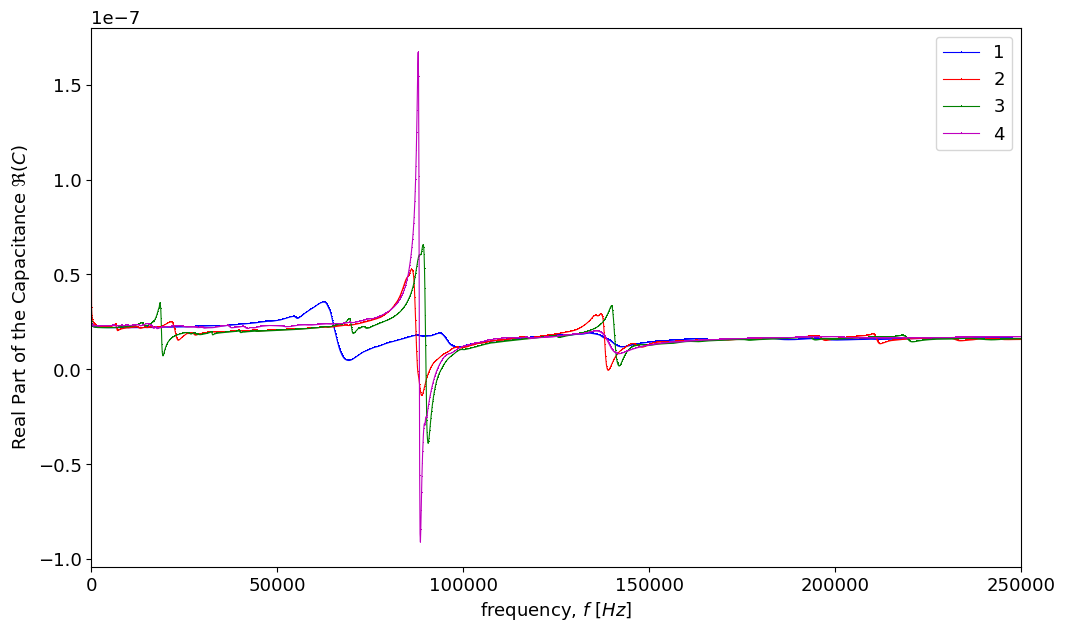

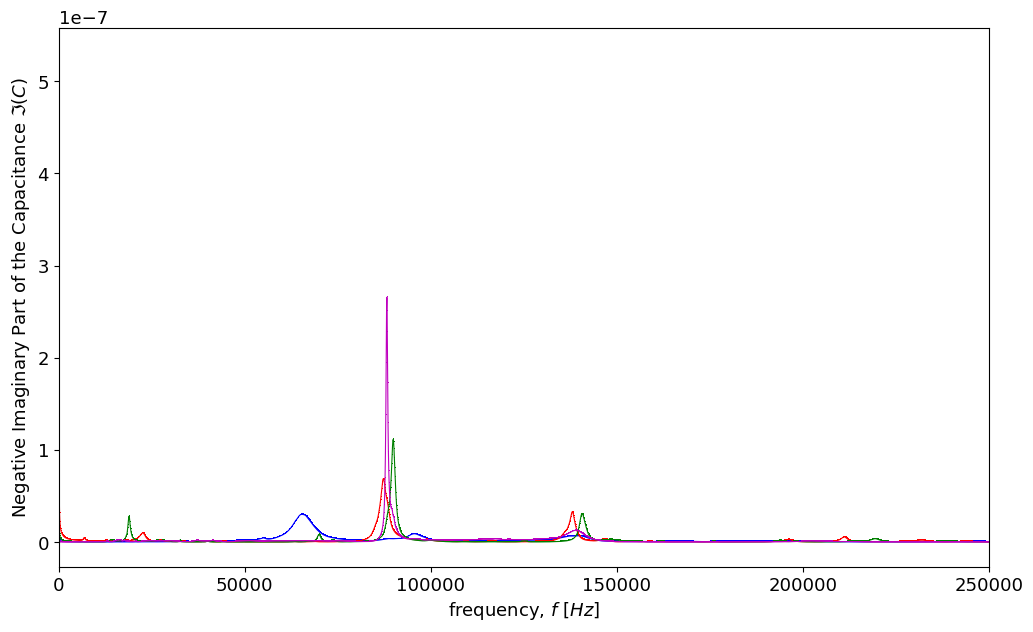

In [41]:
data = res_h2olip
plt.figure(figsize=(12,7))
plt.rc('font', size=13)
plotloop(data, data, ls='-')
plt.xlabel("frequency, $f$ [$Hz$]")
plt.ylabel("Real Part of the Capacitance $\Re(C)$")
plt.xlim(0,2.5e5)
a = np.linspace(1,len(data), len(data), dtype = int)
plt.legend(a)
#plt.savefig('h2olip-measured-0to2.5-real.png',dpi=(150)) 
plt.show()
plt.figure(figsize=(12,7))
plt.rc('font', size=13)
plotloop(data, data, imag=True, ls='-')
plt.xlabel("frequency, $f$ [$Hz$]")
plt.ylabel("Negative Imaginary Part of the Capacitance $\Im(C)$")
plt.xlim(0,2.5e5)
#plt.savefig('h2olip-measured-0to2.5-imag.png',dpi=(150))

/home/user00/Programs/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-5000000000000000.0, 1e+16)

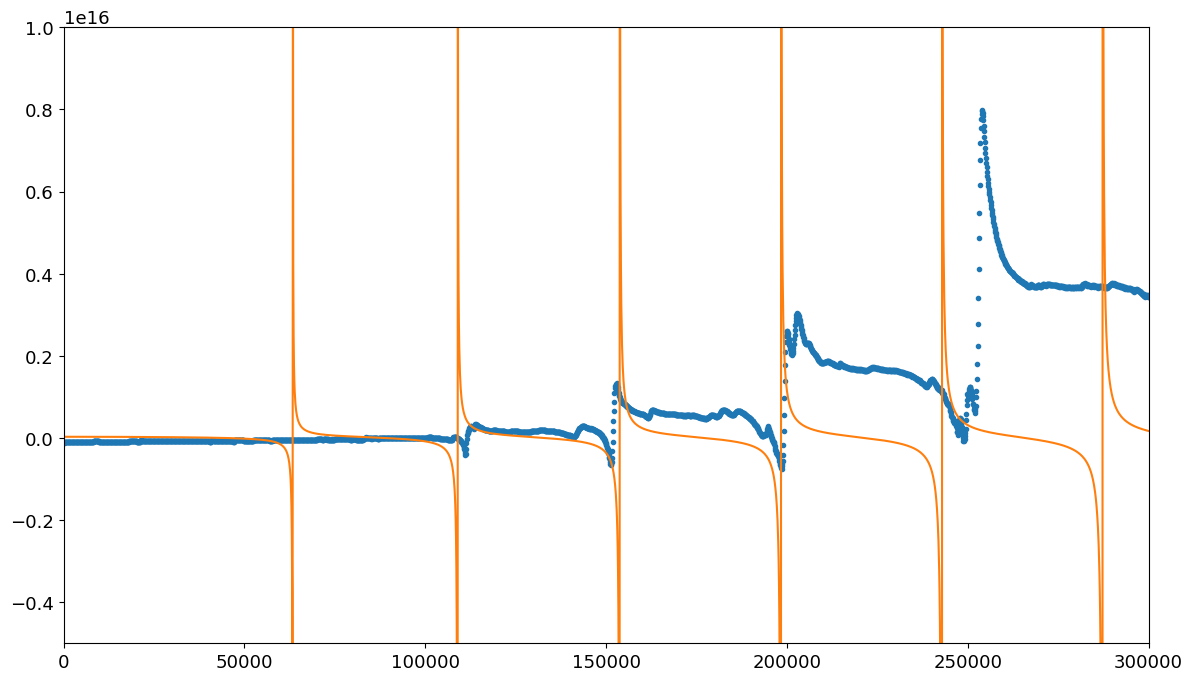

In [13]:
i = 0
p0 =   [[1.2e8, 14.1e3], [1200000, 14300], [1400000, 18400]]
S_fit_e[i] = stiffmodel(res_e[i].fr_bridge, *p0[i])

plt.figure(figsize=(14,8))

plt.plot(res_e[i].fr_bridge, S_e[i], '.')
plt.plot(res_e[i].fr_bridge, S_fit_e[i])

plt.xlim(0,3e5)
plt.ylim(-5e15,1e16)

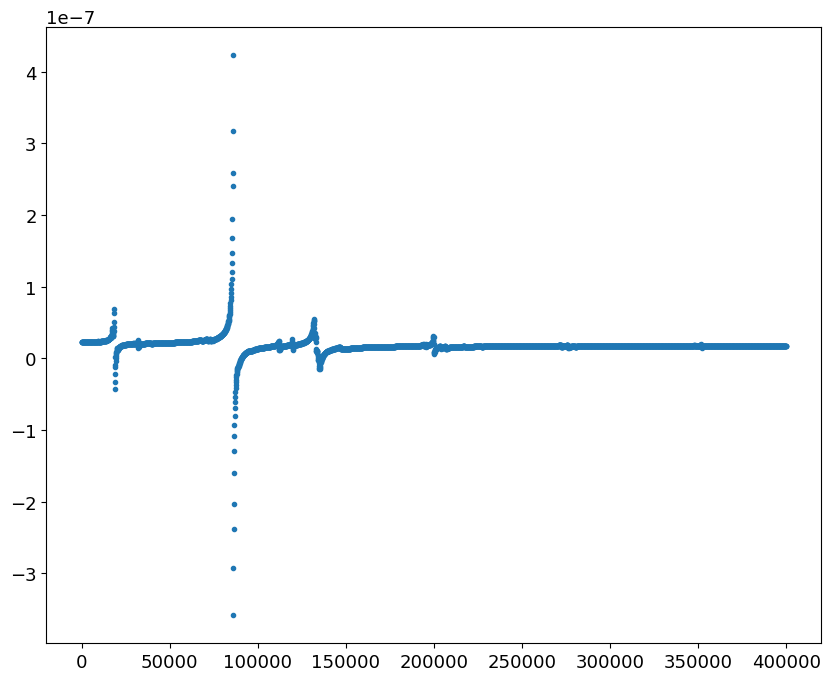

In [94]:
plt.figure(figsize=(10,8))
plt.plot(res_d2o[2].fr_bridge, res_d2o[2].C_bridge, ls='', marker='.')
#for i in range(858,870):
 #   plt.plot(res_d2o[2].fr_bridge[i], res_d2o[2].C_bridge[i], ls='', marker='.')

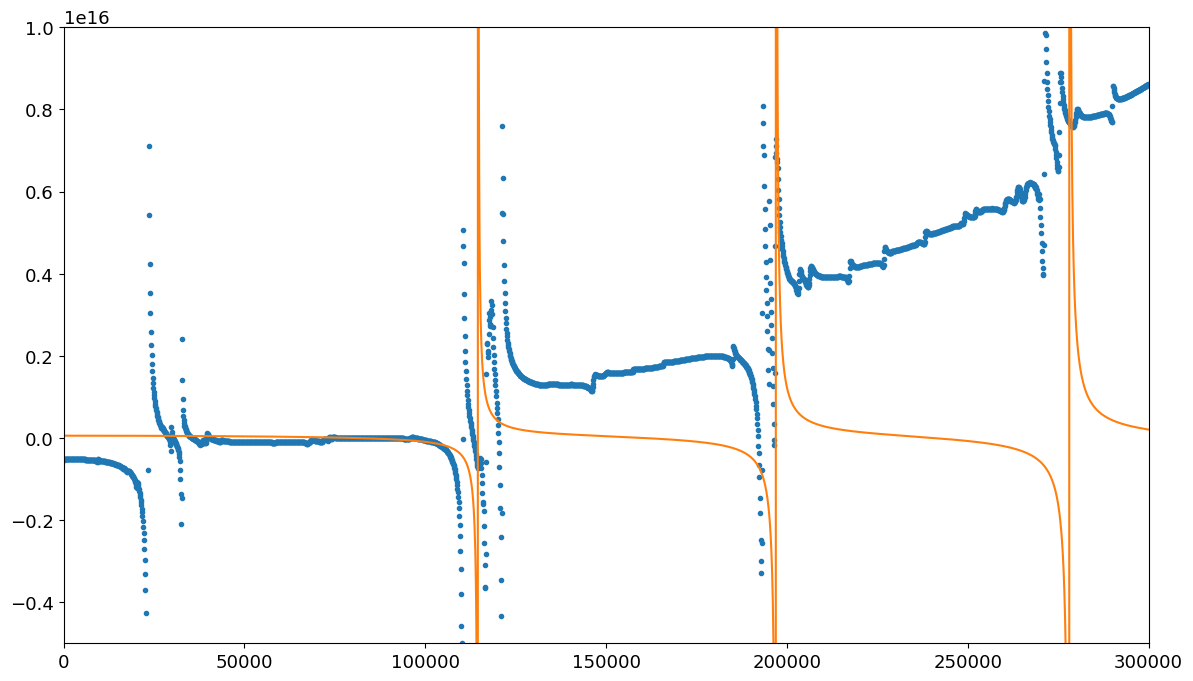

(-5000000000000000.0, 1e+16)

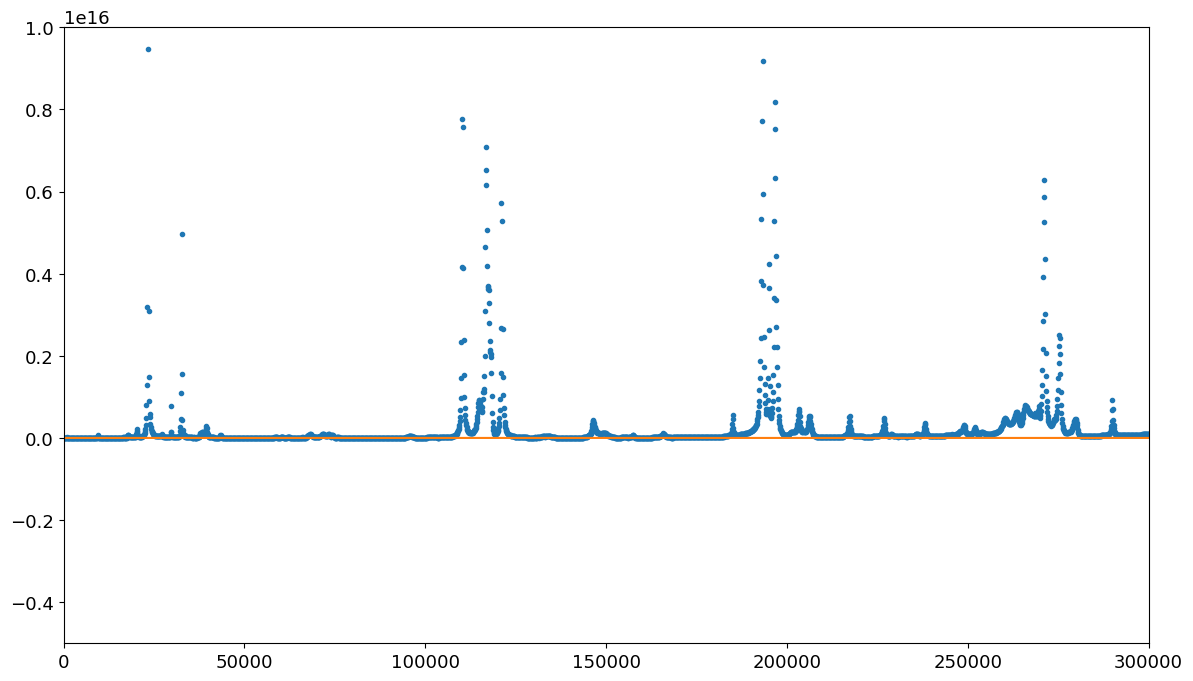

In [96]:
i=2

p0 = [[3.8e8, 2.55e4], [3.8e8, 2.55e4], [2.3e8, 2.55e4]]
S_fit_d2o[i] = stiffmodel(res_d2o[i].fr_bridge, *p0[i])

plt.figure(figsize=(14,8))

plt.plot(res_d2o[i].fr_bridge, S_d2o[i], '.')
plt.plot(res_d2o[i].fr_bridge, S_fit_d2o[i])

plt.xlim(0,3e5)
plt.ylim(-5e15,1e16)

plt.show()
plt.figure(figsize=(14,8))

plt.plot(res_d2o[i].fr_bridge, S_d2o[i].imag, '.')
plt.plot(res_d2o[i].fr_bridge, S_fit_d2o[i].imag)

plt.xlim(0,3e5)
plt.ylim(-5e15,1e16)

(-5000000000000000.0, 1e+16)

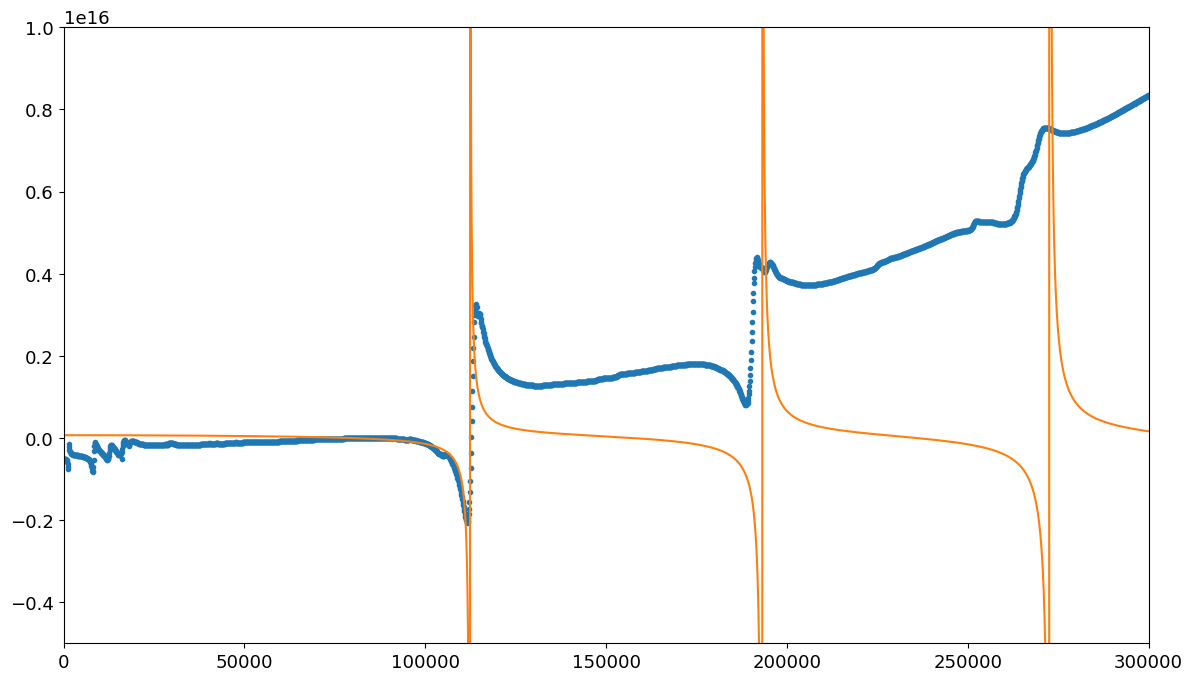

In [15]:
i=3
p0 = [[2e8, 4.2e4], [2e8, 2.46e4], [2e8, 2.57e4], [2.8e8, 2.5e4], [2e8, 2.48e4]]
S_fit_d2olip[i] = stiffmodel(res_d2olip[i].fr_bridge, *p0[i])

plt.figure(figsize=(14,8))

plt.plot(res_d2olip[i].fr_bridge, S_d2olip[i], '.')
plt.plot(res_d2olip[i].fr_bridge, S_fit_d2olip[i])

plt.xlim(0,3e5)
plt.ylim(-5e15,1e16)

(-5000000000000000.0, 1e+16)

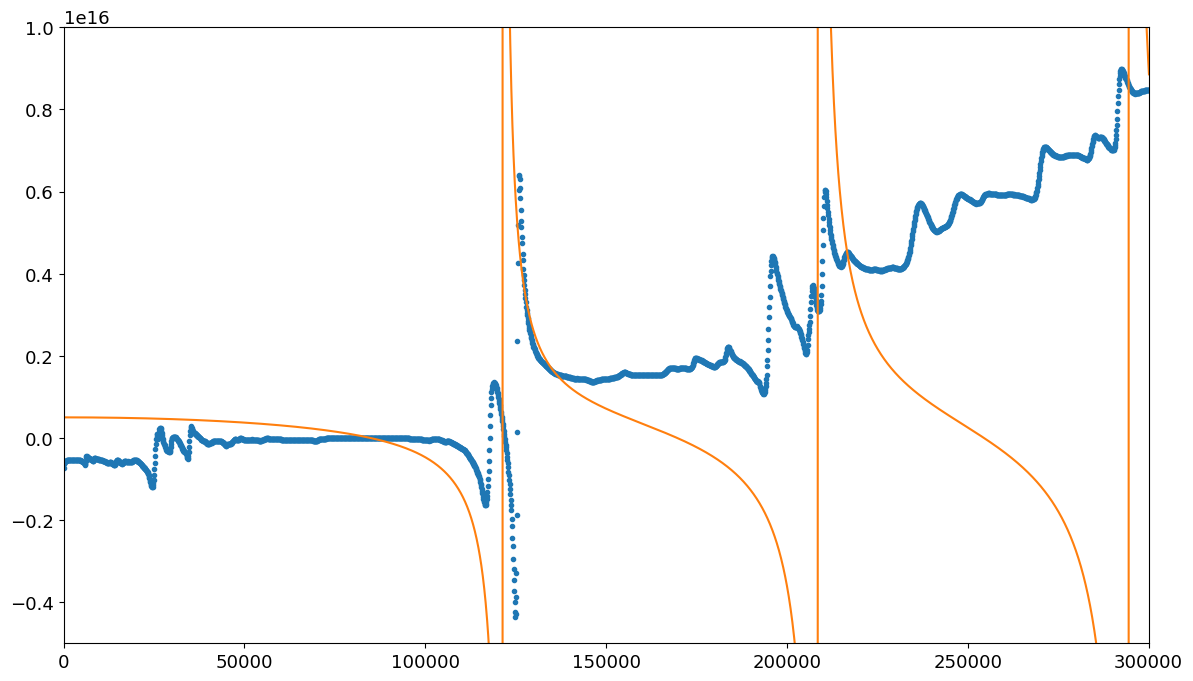

In [16]:
i=1
p0 = [[2.1e9, 2.7e4], [2.1e9, 2.7e4], [2.1e9, 2.7e4]]
S_fit_h2o[i] = stiffmodel(res_h2o[i].fr_bridge, *p0[i])

plt.figure(figsize=(14,8))

plt.plot(res_h2o[i].fr_bridge, S_h2o[i],  '.')
plt.plot(res_h2o[i].fr_bridge, S_fit_h2o[i])

plt.xlim(0,3e5)
plt.ylim(-5e15,1e16)

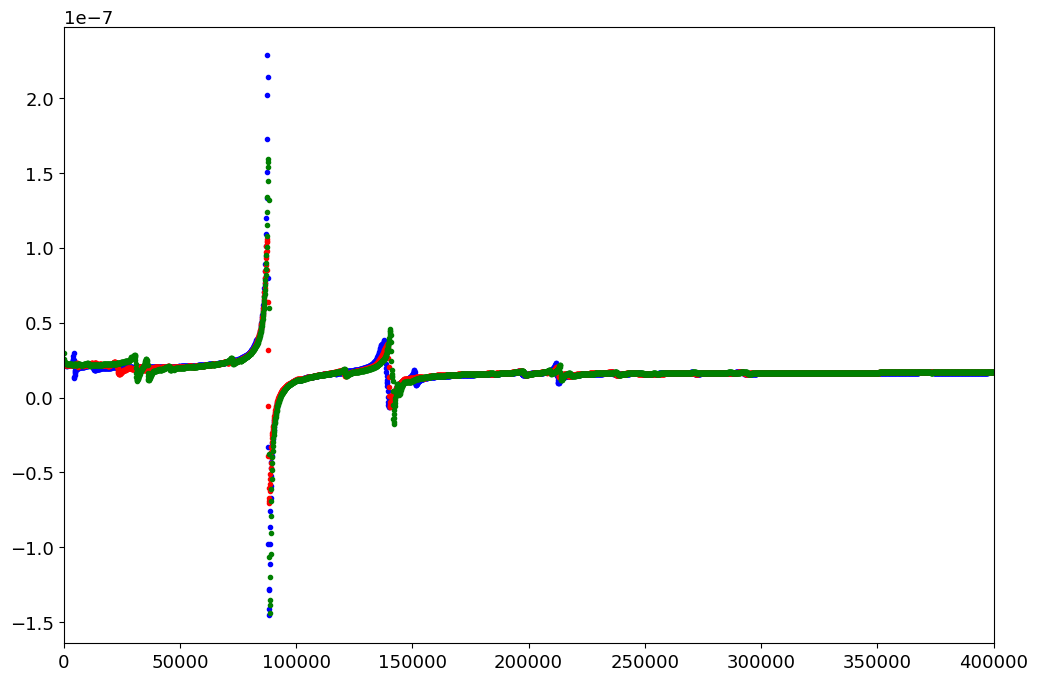

In [22]:
plt.figure(figsize=(12,8))
plotloop(res_h2o, res_h2o, ls='', marker='.')

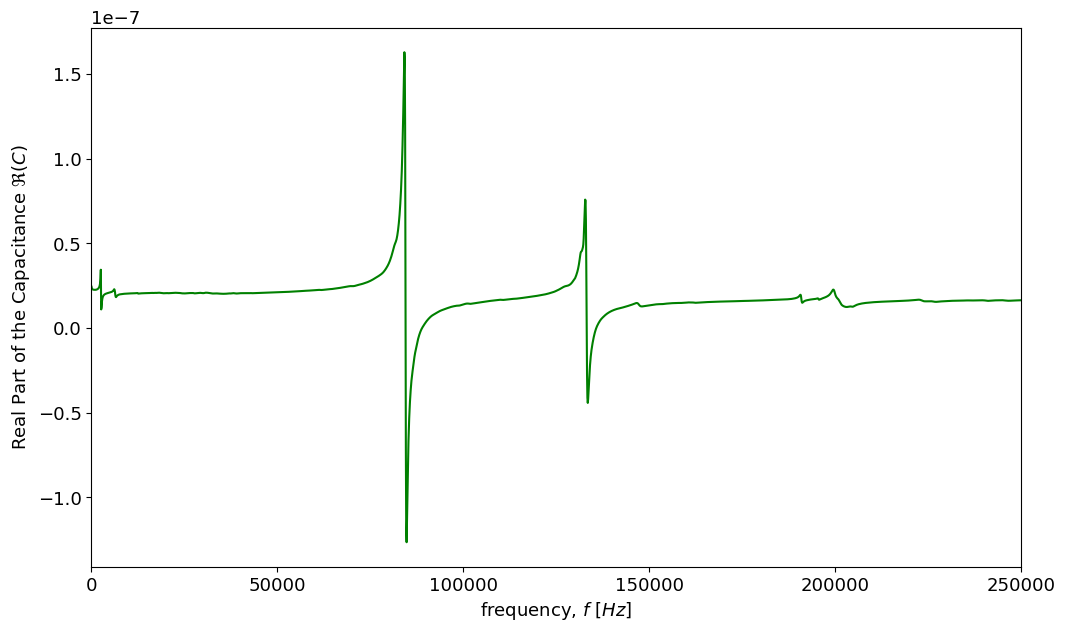

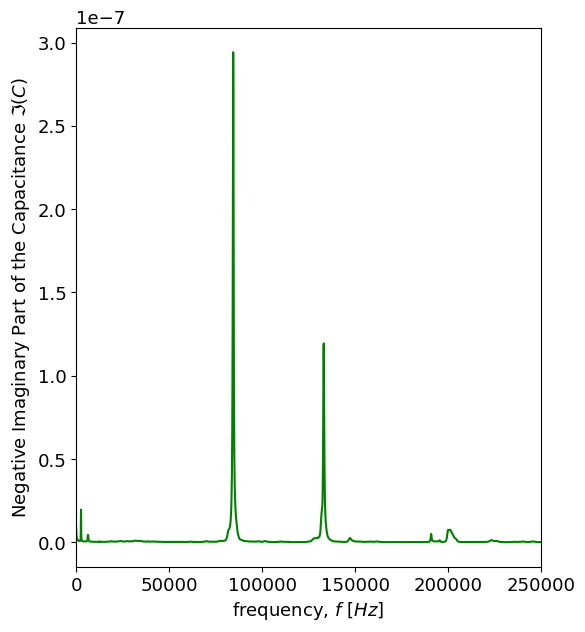

In [49]:
plt.figure(figsize=(12,7))
#plt.plot(res_d2o[0].fr_bridge, res_d2o[0].C_bridge.real, '.b')
plt.plot(res_d2o[0].fr_bridge, res_d2o[0].C_bridge.real, '-g')
plt.xlim(0,2.5e5)
plt.rc('font', size=13)
plt.xlabel("frequency, $f$ [$Hz$]")
plt.ylabel("Real Part of the Capacitance $\Re(C)$")
#plt.savefig('d2o-measured-ex0-real',dpi=(150)) 
plt.show()
plt.figure(figsize=(6,7))
plt.rc('font', size=13)
#plt.plot(res_d2o[0].fr_bridge, -res_d2o[0].C_bridge.imag, '.b')
plt.plot(res_d2o[0].fr_bridge, -res_d2o[0].C_bridge.imag, '-g')
plt.xlabel("frequency, $f$ [$Hz$]")
plt.ylabel("Negative Imaginary Part of the Capacitance $\Im(C)$")
plt.xlim(0,2.5e5)
plt.savefig('d2o-measured-ex0-imag-distorteddim',dpi=(150))

In [ ]:
def findresfc(f, fc

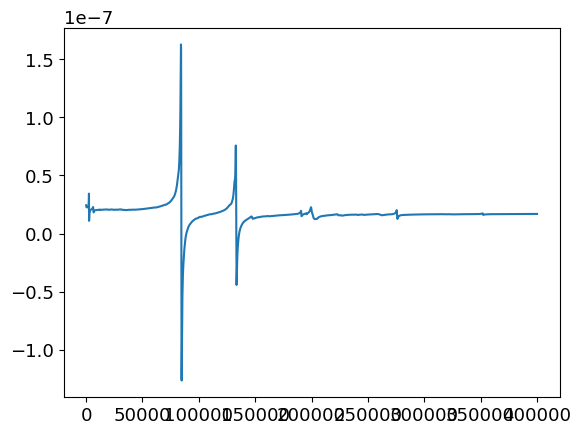

In [112]:
#plotloop(res_e, res_e)
plt.plot(res_d2o[0].fr_bridge, res_d2o[0].C_bridge, ls='-')